# Project: Investigate a Dataset (Medical Appointment No Shows)

## Introduction 
In this project I will investigate a dataset that contains 110.527 medical appointments of in Brazil and its 14 associated variables. The main variable is whether or not patients show up for their appointment. 

The other variables are ; PatientId, AppointmentID, The day someone called or registered the appointment, The day of the actuall appointment, Gender, Age , Neighbourhood,  Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received , No-show. There are plenty of questions that can be explored using this information. 

The goals of this investigation is to find the common reasons behind patient no-shows. I will look for each factor and its effects. <br/>


## Data Wrangling


> Importing packages and data csv 

In [94]:
#Importing packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
#reading dataset
df = pd.read_csv('MedAppt_v0.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> Description of tha data 

In [96]:
#summary of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>  Dropping columns that are not useful at this point.
Some columns can be dropped as ID nummber and appointment ID. <br/>

In [98]:
#Dropping unnecessary columns ussing pandas 
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace= True)
df.head(1)


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Cleaning the data
> Scheduled Day and Appointment Day contain two types of data that needed to be splited by using datetime function. Then create seperated columns for day , month, year, and time. <br/>

In [99]:
#split Scheduled Day into date and time 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'],errors='coerce')
df['Scheduled_date'] = df['ScheduledDay'].dt.weekday_name 
df['Scheduled_month'] = df['ScheduledDay'].dt.month_name 
df['Scheduled_year'] = df['ScheduledDay'].dt.year
df['Scheduled_time'] = df['ScheduledDay'].dt.time

df['Scheduled_time'] = df['ScheduledDay'].dt.time
#Now we can drop ScheduledDay 
df.drop (['ScheduledDay'], axis=1, inplace=True)
df.head(1)

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_date,Scheduled_month,Scheduled_year,Scheduled_time
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,<bound method PandasDelegate._add_delegate_acc...,2016,18:38:08


In [100]:
#split Appointment Day into date and time 
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['Appointment_date'] = df['AppointmentDay'].dt.weekday_name
df['Appointment_month'] = df['AppointmentDay'].dt.month_name 
df['Appointment_year'] = df['AppointmentDay'].dt.year 
df['Appointment_time'] = df['AppointmentDay'].dt.time
#Now we can drop ScheduledDay and Appointment_time(cuz all values are zero)
df.drop (['AppointmentDay'], axis=1, inplace=True)
df.drop (['Appointment_time'], axis=1, inplace=True)

df.head(6)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_date,Scheduled_month,Scheduled_year,Scheduled_time,Appointment_date,Appointment_month,Appointment_year
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,<bound method PandasDelegate._add_delegate_acc...,2016,18:38:08,Friday,<bound method PandasDelegate._add_delegate_acc...,2016
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,<bound method PandasDelegate._add_delegate_acc...,2016,16:08:27,Friday,<bound method PandasDelegate._add_delegate_acc...,2016
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,<bound method PandasDelegate._add_delegate_acc...,2016,16:19:04,Friday,<bound method PandasDelegate._add_delegate_acc...,2016
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,<bound method PandasDelegate._add_delegate_acc...,2016,17:29:31,Friday,<bound method PandasDelegate._add_delegate_acc...,2016
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,<bound method PandasDelegate._add_delegate_acc...,2016,16:07:23,Friday,<bound method PandasDelegate._add_delegate_acc...,2016
5,F,76,REPÚBLICA,0,1,0,0,0,0,No,Wednesday,<bound method PandasDelegate._add_delegate_acc...,2016,08:36:51,Friday,<bound method PandasDelegate._add_delegate_acc...,2016


##### Renaming 
> Rename column No-show to be easy to use 

In [101]:
# rename no-show to no_show 
df.rename(columns={"No-show": "no_show"}, inplace=True)
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,Scheduled_date,Scheduled_month,Scheduled_year,Scheduled_time,Appointment_date,Appointment_month,Appointment_year
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,<bound method PandasDelegate._add_delegate_acc...,2016,18:38:08,Friday,<bound method PandasDelegate._add_delegate_acc...,2016


### Finding Missing Values 

In [102]:
#Finding ionly zero column
(df == 0).all()

Gender               False
Age                  False
Neighbourhood        False
Scholarship          False
Hipertension         False
Diabetes             False
Alcoholism           False
Handcap              False
SMS_received         False
no_show              False
Scheduled_date       False
Scheduled_month      False
Scheduled_year       False
Scheduled_time       False
Appointment_date     False
Appointment_month    False
Appointment_year     False
dtype: bool

In [103]:
#missing vale
df.isnull().sum()


Gender               0
Age                  0
Neighbourhood        0
Scholarship          0
Hipertension         0
Diabetes             0
Alcoholism           0
Handcap              0
SMS_received         0
no_show              0
Scheduled_date       0
Scheduled_month      0
Scheduled_year       0
Scheduled_time       0
Appointment_date     0
Appointment_month    0
Appointment_year     0
dtype: int64

> We can see that the data are clean at this point.

 #### Finally the shape and # of unique values for each variables

In [104]:
df.shape

(110527, 17)

In [105]:
#unique values 
df.nunique()

Gender                   2
Age                    104
Neighbourhood           81
Scholarship              2
Hipertension             2
Diabetes                 2
Alcoholism               2
Handcap                  5
SMS_received             2
no_show                  2
Scheduled_date           6
Scheduled_month          1
Scheduled_year           2
Scheduled_time       37109
Appointment_date         6
Appointment_month        1
Appointment_year         1
dtype: int64

In [106]:
#unique number of age
np.unique(df.Age)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

# Exploratory Data Analysis  <br />

### Gender

### Which gender visiting hospital more? <b>

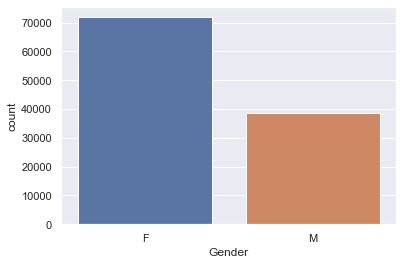

In [107]:
#using sns to find which gender visiting clinic more
sns.set(style="darkgrid")
sns.countplot(x='Gender',data=df);


> The number of female is approximately double the number of male.  <br /> <br />



## The percentage of  female and male

In [108]:
df['Gender'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

F    65.0%
M    35.0%
Name: Gender, dtype: object

### Which gender missed more appointment? <br/>

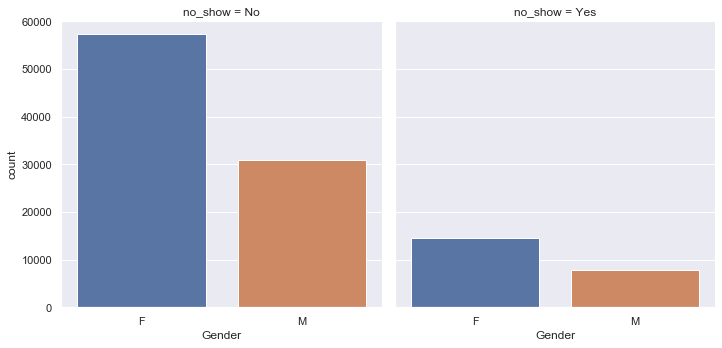

In [124]:
 sns.catplot(x="Gender", col="no_show",

                data=df, kind="count");

> It seems that there is no difference between these proportion. 

## Age 

#### Calculating the mean age  <br/>

In [110]:
#calculating the mean of age for ones who missed their appointment
df_noShow = df[df['no_show'] == 'Yes']
df_noShow.mean().Age

34.31766656212196

In [111]:
#calculating the mean of age for ones who show

df_Show = df[df['no_show'] == 'No']
df_Show.mean().Age

37.790064393252315

> There is a slight differences. <br/>

#### Age based on gender<br/>

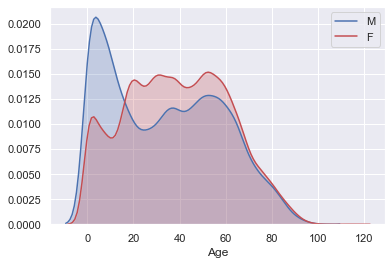

In [112]:
#plotting age and gender
sns.kdeplot(df.Age[df.Gender == 'M'], color = 'b',shade=True)
sns.kdeplot(df.Age[df.Gender == 'F'],color = 'r',shade=True)
plt.legend(['M','F'])
plt.xlabel('Age');

## The percentage of  show and no show

In [113]:
df['no_show'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

No     79.8%
Yes    20.2%
Name: no_show, dtype: object

### The effect of sending SMS <br/>

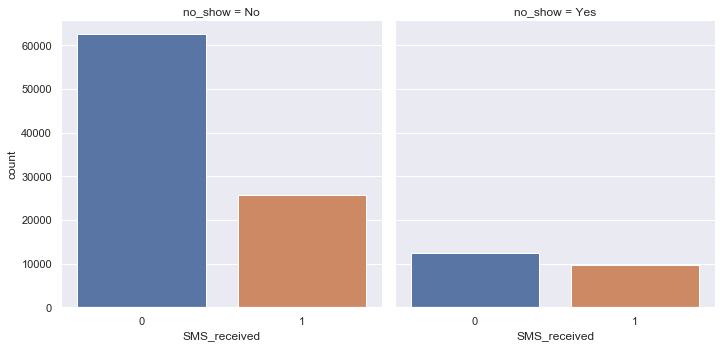

In [114]:
#the effect of sending SMS 
sns.catplot(x="SMS_received", col="no_show",

                data=df, kind="count");

> In the no show group, the received SMS has no effect.

### The effect of Scholarship, Hipertension, Diabetes, Alcoholism,and  Handcap

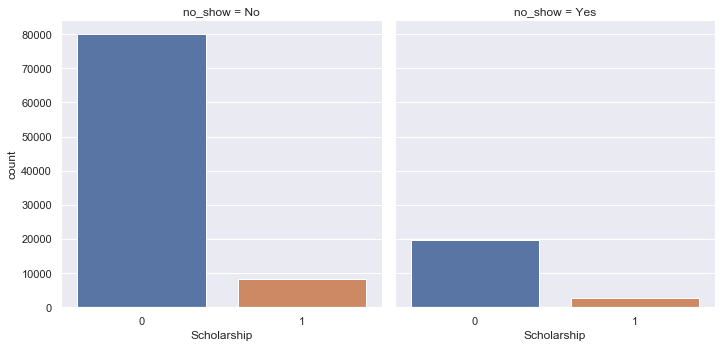

In [115]:
#the effect of Scholarship
sns.catplot(x="Scholarship", col="no_show",

                data=df, kind="count");

> The majority of people who missed their appointment do not have a Scholarship. 

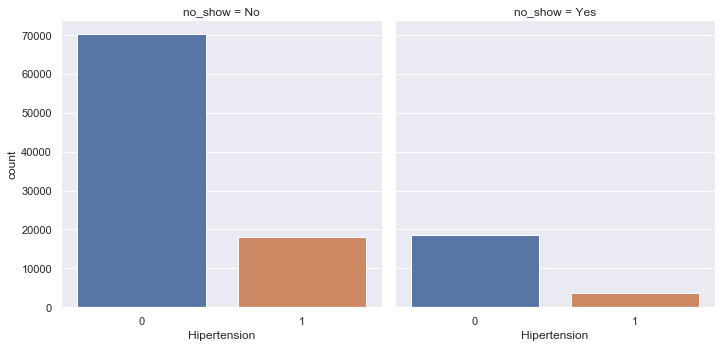

In [116]:
#the effect of Hipertension
sns.catplot(x="Hipertension", col="no_show",

                data=df, kind="count");

> Hipertension seems to have no effect on no shows.

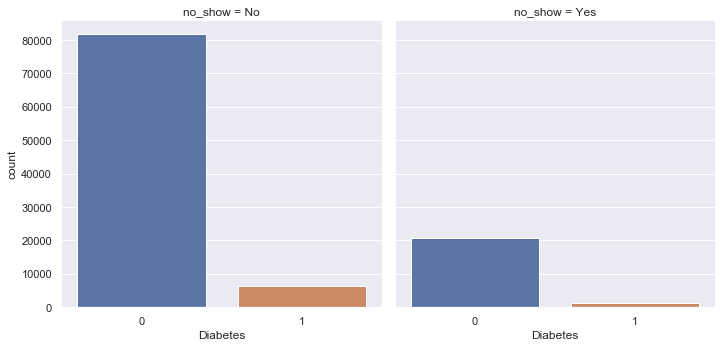

In [117]:
#the effect of Diabetes
sns.catplot(x="Diabetes", col="no_show",

                data=df, kind="count");

> Diabetes also have no effect on no shows.

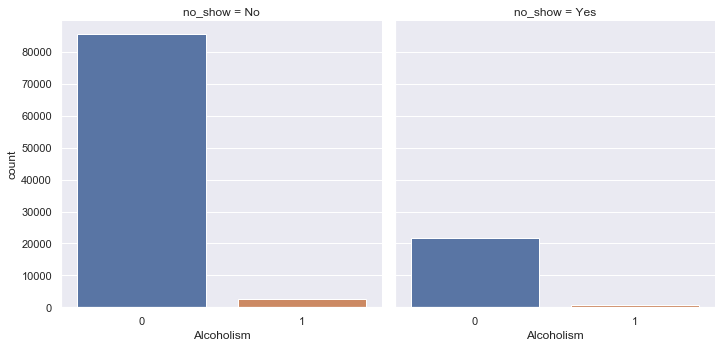

In [118]:
#the effect of Alcoholism
sns.catplot(x="Alcoholism", col="no_show",

                data=df, kind="count");

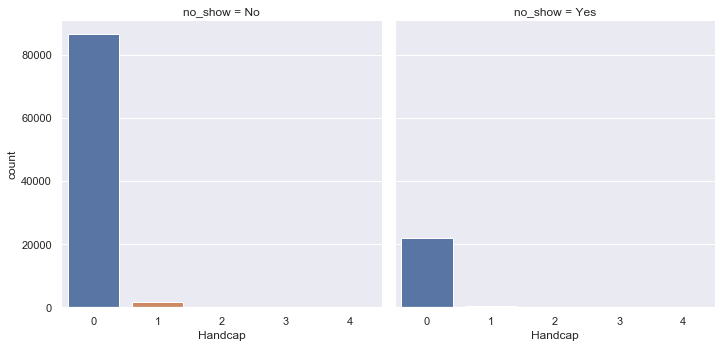

In [119]:
#the effect of  Handcap
sns.catplot(x="Handcap", col="no_show",

                data=df, kind="count");

> Handcap and Alcoholism have no effect on no shows.

### The number of not showing based on neighbourhood <br/>

##### Which neighbourhoods have the highest number of no shows? <br/>


In [120]:
# which neighbourhoods have the highest number of no shows?
show = df[df['no_show'] == 'Yes']
show.groupby('Neighbourhood')['no_show'].count().sort_values(ascending=False).head(5)

Neighbourhood
JARDIM CAMBURI    1465
MARIA ORTIZ       1219
ITARARÉ            923
RESISTÊNCIA        906
CENTRO             703
Name: no_show, dtype: int64

> These are the top 5 neighbourhood in the missing appointment group

##### Which neighbourhoods have the lowest number of no shows? <br/>


In [121]:
show.groupby('Neighbourhood')['no_show'].count().sort_values(ascending=True).head(5)

Neighbourhood
AEROPORTO                       1
ILHA DO FRADE                   2
ILHAS OCEÂNICAS DE TRINDADE     2
ILHA DO BOI                     3
PONTAL DE CAMBURI              12
Name: no_show, dtype: int64

### Neighbourhood vs show and no show <br/>

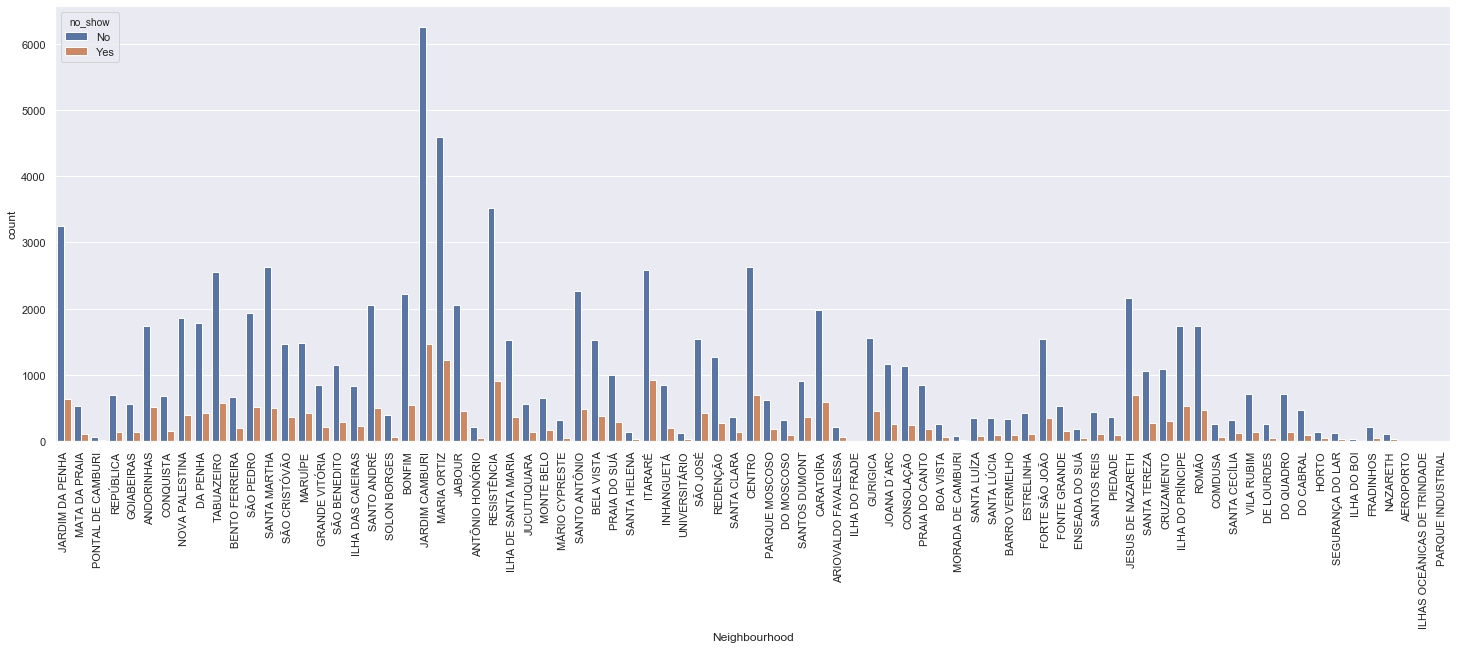

In [122]:

plt.figure(figsize=(25,8))
sns.countplot(x='Neighbourhood', hue='no_show', data=df)
plt.xticks(rotation=90);


##### The influnce of the day of the week <br/>


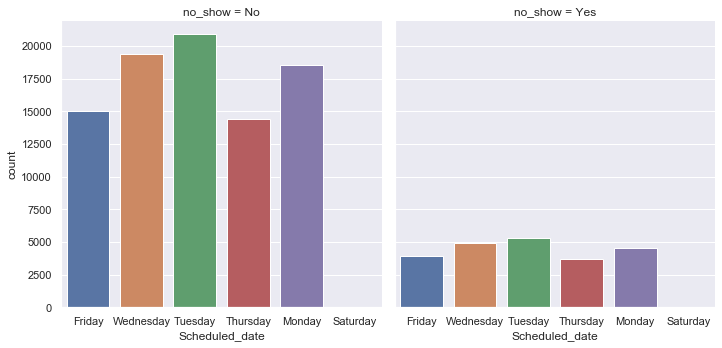

In [123]:
sns.catplot(x="Scheduled_date", col="no_show",

                data=df, kind="count");

> We can see that there is no significant difference based on the day of week.

## Conclusion <br/>


>The most factor that related to no shows is the neighbourhood. However, the data are limited to explore this factor throughly. <br/>

>There are some surprising results such as patients show for their appointments despite having no scholarship, also not receiving a SMS. <br/>

>Females are the majority of the patients but there is no difference between the proportions of no show of females and males. <br/>

<br/>